In [1]:
import pandas as pd
import numpy as np
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.factors.discrete import TabularCPD

In [2]:
!pip install networkx matplotlib



[notice] A new release of pip available: 22.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.models import BayesianNetwork

In [ ]:
data = pd.read_csv("CVD22.csv")
print(data.head())

   Age  Gender  Weight  Limited_access_ to_healthcare  CVD_knowledge(1-5)  \
0  0.0     0.0    85.0                            0.0                 2.0   
1  0.0     1.0    95.0                            1.0                 1.0   
2  0.0     0.0    86.0                            1.0                 1.0   
3  0.0     1.0    60.0                            1.0                 1.0   
4  0.0     1.0    54.0                            1.0                 1.0   

   Blood_pressure  Excercise  Smoking   Alcohol_Consumption  \
0             1.0        2.0      0.0                   1.0   
1             2.0        0.0      0.0                   1.0   
2             1.0        2.0      0.0                   0.0   
3             1.0        0.0      0.0                   0.0   
4             1.0        0.0      0.0                   0.0   

   Fastfood_consumption?  CVD   FamilyMembers  
0                    2.0  0.0             1.0  
1                    2.0  0.0             1.0  
2             

In [ ]:

# Age: 
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')  # Converts 'Age' to numeric, handles any errors

# Weight: 
data['Weight'] = pd.to_numeric(data['Weight'], errors='coerce')  # Converts 'Weight' to numeric, handles any errors

# Show a preview of the cleaned dataset
print(data.head())

   Age  Gender  Weight  Limited_access_ to_healthcare  CVD_knowledge(1-5)  \
0  0.0     0.0    85.0                            0.0                 2.0   
1  0.0     1.0    95.0                            1.0                 1.0   
2  0.0     0.0    86.0                            1.0                 1.0   
3  0.0     1.0    60.0                            1.0                 1.0   
4  0.0     1.0    54.0                            1.0                 1.0   

   Blood_pressure  Excercise  Smoking   Alcohol_Consumption  \
0             1.0        2.0      0.0                   1.0   
1             2.0        0.0      0.0                   1.0   
2             1.0        2.0      0.0                   0.0   
3             1.0        0.0      0.0                   0.0   
4             1.0        0.0      0.0                   0.0   

   Fastfood_consumption?  CVD   FamilyMembers  
0                    2.0  0.0             1.0  
1                    2.0  0.0             1.0  
2             

In [6]:
print(data[' Alcohol_Consumption'].unique())

[ 1.  0.  2. nan]


In [7]:
print(data.columns)


Index(['Age', 'Gender', 'Weight', 'Limited_access_ to_healthcare',
       'CVD_knowledge(1-5)', 'Blood_pressure', 'Excercise', 'Smoking',
       ' Alcohol_Consumption', 'Fastfood_consumption?', 'CVD',
       ' FamilyMembers'],
      dtype='object')


In [106]:
variables = ['Age', 'Weight', 'Blood_pressure', 'Excercise', 'Smoking', ' Alcohol_Consumption', 'Fastfood_consumption?', 'FamilyMembers', 'CVD_knowledge(1-5)', 'Limited_access_ to_healthcare', 'CVD']

cpt_age = TabularCPD(
    variable='Age',
    variable_card=5,  # 0: 0-30, 1: 31-50, 2: 51+
    values=[[0.4], 
            [0.2], 
            [0.2],
            [0.1],
            [0.1]]  # example probabilities
)



cpt_blood_pressure = TabularCPD(
    variable='Blood_pressure',
    variable_card=3,  # 0: Normal, 1: High, 2: Very High
    values=[[0.6], [0.2], [0.2]]  # example probabilities
)


cpt_excercise = TabularCPD(
    variable='Excercise',
    variable_card=3,  # 0: No, 1: Yes
    values=[[0.7],[0.2],[0.1]]  # example probabilities
)


cpt_smoking = TabularCPD(
    variable='Smoking',
    variable_card=2,  # 0: No, 1: Yes
    values=[[0.8], [0.2]]  # example probabilities
)


cpt_alcohol_consumption = TabularCPD(
    variable=' Alcohol_Consumption',
    variable_card=3,  # 0: None, 1: Moderate, 2: Heavy
    values=[[0.5], [0.3],[0.2]]  # example probabilities
)


cpt_fastfood_consumption = TabularCPD(
    variable='Fastfood_consumption?',
    variable_card=3,  # 0: Low, 1: Moderate, 2: High
    values=[[0.6], [0.2], [0.2]]  # example probabilities
)


cpt_family_members = TabularCPD(
    variable=' FamilyMembers',
    variable_card=2,  # 0: No, 1: Yes
    values=[[0.7], [0.3]]  # example probabilities
)


cpt_cvd_knowledge = TabularCPD(
    variable='CVD_knowledge(1-5)',
    variable_card=5,  # 1: Low, 2: Moderate, 3: High, 4: Very High, 5: Expert
    values=[[0.2], [0.2], [0.2], [0.2],[ 0.2]]  # example probabilities
)


cpt_limited_access_to_healthcare = TabularCPD(
    variable='Limited_access_ to_healthcare',
    variable_card=2,  # 0: No, 1: Yes
    values=[[0.8], [0.2]]  # example probabilities
)


    
  
values = np.random.rand(2, 3240)  # Change the shape to (2, 4320)
values = values / np.sum(values, axis=0)


# Create the TabularCPD
cpt_cvd = TabularCPD(
    variable='CVD',
    variable_card=2,  # 0: No CVD, 1: CVD
    values=values,
    evidence=['Age', 'Blood_pressure', 'Excercise', 'Smoking', ' Alcohol_Consumption', 'Fastfood_consumption?', ' FamilyMembers',  'Limited_access_ to_healthcare'],
    evidence_card=[5, 3, 3, 2, 3, 3, 2, 2]  # number of categories for each evidence variable
)




In [107]:
from pgmpy.factors.discrete import TabularCPD

In [108]:
# Define the Bayesian Network structure (edges between nodes)
model = BayesianNetwork([
    ('Age', 'CVD'),
    ('Blood_pressure', 'CVD'),
    ('Excercise', 'CVD'),
    ('Smoking', 'CVD'),
    (' Alcohol_Consumption', 'CVD'),
    ('Fastfood_consumption?', 'CVD'),
    (' FamilyMembers', 'CVD'),
    ('Limited_access_ to_healthcare', 'CVD')
])


In [109]:
cpt_alcohol_consumption = TabularCPD(
    variable=' Alcohol_Consumption',
    variable_card=3,  # 0: None, 1: Moderate, 2: Heavy
    values=[[0.5], [0.3],[0.2]]  # example probabilities
)

In [110]:
# Add the CPDs to the model
model.add_cpds(cpt_age, 
                 cpt_blood_pressure, 
                 cpt_excercise, 
                 cpt_smoking, 
                 cpt_alcohol_consumption, 
                 cpt_fastfood_consumption, 
                 cpt_family_members, 
                 #cpt_cvd_knowledge, 
                 cpt_limited_access_to_healthcare, 
                 cpt_cvd)

In [111]:
model.check_model()

True

In [112]:
# Create an inference object
inference = VariableElimination(model)

# Query the probability of CVD given some evidence
query = inference.query(variables=['CVD'], evidence={'Age': 3, 'Smoking': 1, 'Excercise': 1})

print(query)

+--------+------------+
| CVD    |   phi(CVD) |
+========+============+
| CVD(0) |     0.5239 |
+--------+------------+
| CVD(1) |     0.4761 |
+--------+------------+


In [97]:
print(data.columns)


Index(['Age', 'Gender', 'Weight', 'Limited_access_ to_healthcare',
       'CVD_knowledge(1-5)', 'Blood_pressure', 'Excercise', 'Smoking',
       ' Alcohol_Consumption', 'Fastfood_consumption?', 'CVD',
       ' FamilyMembers'],
      dtype='object')


In [96]:
assert model.check_model()


In [ ]:
inference = VariableElimination(model)



In [ ]:
print(query)

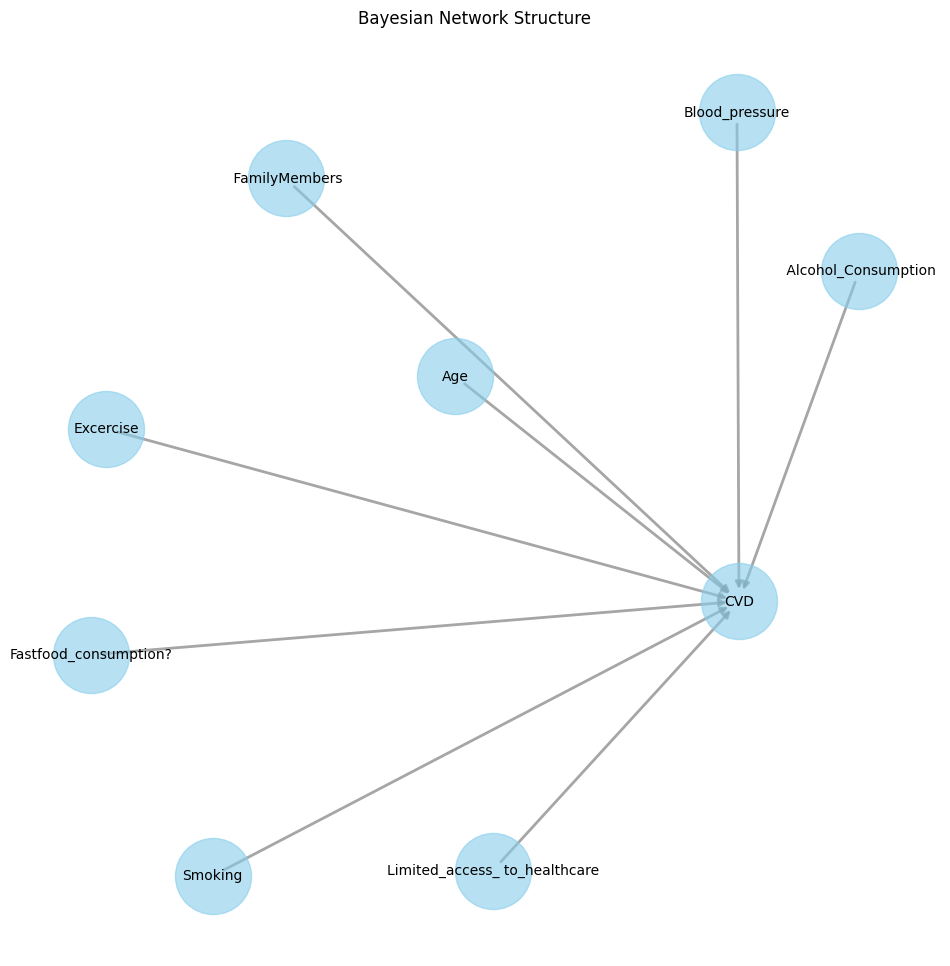

In [99]:
# Visualizing the Bayesian Network structure using NetworkX
def plot_bayesian_network(model):
    # Get the structure of the Bayesian Network
    edges = model.edges()

    # Create a directed graph for visualization
    G = nx.DiGraph()
    G.add_edges_from(edges)

    # Set plot size
    plt.figure(figsize=(12, 12))

    # Draw the graph using networkx
    pos = nx.spring_layout(G, k=0.5)  # position nodes using spring layout
    nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='skyblue', alpha=0.6)
    nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
    nx.draw_networkx_edges(G, pos, width=2, alpha=0.7, edge_color='gray')

    # Show the plot
    plt.title("Bayesian Network Structure")
    plt.axis('off')  # Hide the axes for better visualization
    plt.show()

# Call the function to visualize the Bayesian Network
plot_bayesian_network(model)